In [2]:
%load_ext autoreload

In [48]:
%autoreload 2
import molparse as mp
from rdkit import Chem
from rdkit.Chem import PandasTools
from pathlib import Path
from posebutcher import PoseButcher
from tqdm import tqdm
import pandas as pd
import plotly.express as px

# Paths

In [103]:
x0310_pdb = Path('/Users/tfb64483/Data/A71EV2A/Design_Wave2/pdbs/x0310_original.pdb')
x0528_pdb = Path('/Users/tfb64483/Data/A71EV2A/Design_Wave2/pdbs/x0528.pdb')
x0875_pdb = Path('/Users/tfb64483/Data/A71EV2A/Design_Wave2/pdbs/x0875.pdb')
mf_x0310 = Path('/Users/tfb64483/Software/PoseButcher/butcher_2a_x0310/protein.pdb')

# Butchers

In [105]:
butcher_x0310 = PoseButcher.from_directory('butcher_2a_x0310')
butcher_x0528 = PoseButcher.from_directory('butcher_2a_x0528')
butcher_x0875 = PoseButcher.from_directory('butcher_2a_x0875')
butcher_mf_x0310 = PoseButcher.from_directory('butcher_2a_mf_x0310')

 DISK  Reading butcher_2a_x0310/butcher_2a_x0310.json
 DISK  Reading butcher_2a_x0310/_fragment_atomgroup.pdb
 DISK  Reading butcher_2a_x0310/protein.pdb
 DISK  Writing _butcher_protein.pdb
 DISK  Reading butcher_2a_x0310/_protein_hull.ply
 DISK  Reading butcher_2a_x0310/_protein_mesh.ply
 DISK  Reading butcher_2a_x0310/pocket_P1.ply
 DISK  Reading butcher_2a_x0310/pocket_P2.ply
 DISK  Reading butcher_2a_x0310/pocket_P1'.ply
 DISK  Reading butcher_2a_x0310/pocket_P2'.ply
 DISK  Reading butcher_2a_x0310/pocket_P3.ply
 DISK  Reading butcher_2a_x0310/pocket_P4.ply
 DISK  Reading butcher_2a_x0310/pocket_P5.ply
 DISK  Reading butcher_2a_x0310/pocket_P6.ply
 SUCCESS  PoseButcher loaded!
 DISK  Reading butcher_2a_x0528/butcher_2a_x0528.json
 DISK  Reading butcher_2a_x0528/_fragment_atomgroup.pdb
 DISK  Reading butcher_2a_x0528/protein.pdb
 DISK  Writing _butcher_protein.pdb
 DISK  Reading butcher_2a_x0528/_protein_hull.ply
 DISK  Reading butcher_2a_x0528/_protein_mesh.ply
 DISK  Reading butch

In [104]:
butcher = PoseButcher.from_directory('butcher_2a_x0310')
butcher.protein = mf_x0310
butcher._parse_pockets()
butcher.write('butcher_2a_mf_x0310')

 DISK  Reading butcher_2a_x0310/butcher_2a_x0310.json
 DISK  Reading butcher_2a_x0310/_fragment_atomgroup.pdb
 DISK  Reading butcher_2a_x0310/protein.pdb
 DISK  Writing _butcher_protein.pdb
 DISK  Reading butcher_2a_x0310/_protein_hull.ply
 DISK  Reading butcher_2a_x0310/_protein_mesh.ply
 DISK  Reading butcher_2a_x0310/pocket_P1.ply
 DISK  Reading butcher_2a_x0310/pocket_P2.ply
 DISK  Reading butcher_2a_x0310/pocket_P1'.ply
 DISK  Reading butcher_2a_x0310/pocket_P2'.ply
 DISK  Reading butcher_2a_x0310/pocket_P3.ply
 DISK  Reading butcher_2a_x0310/pocket_P4.ply
 DISK  Reading butcher_2a_x0310/pocket_P5.ply
 DISK  Reading butcher_2a_x0310/pocket_P6.ply
 SUCCESS  PoseButcher loaded!
 DISK  Reading /Users/tfb64483/Software/PoseButcher/butcher_2a_x0310/protein.pdb
 DISK  Writing _butcher_protein.pdb
Pocket "P1", radius=4.43, center=[9.50, 11.36, 24.20]
Pocket "P2", radius=3.58, center=[9.16, 16.79, 20.45]
Pocket "P1'", radius=4.11, center=[13.54, 14.77, 25.75]
Pocket "P2'", radius=4.12, ce

# FEGrow

In [29]:
butcher_x0310._crystal = 'x0310'
butcher_x0528._crystal = 'x0528'
butcher_x0875._crystal = 'x0875'

fegrow_x0351_sdf = Path('/Users/tfb64483/Data/A71EV2A/FEGrow/iteration2/x0351_p2_elab/x0358-P2-elab.sdf')
fegrow_x0351_butcher = butcher_x0310

fegrow_x0528_sdf = Path('/Users/tfb64483/Data/A71EV2A/FEGrow/iteration2/x0528_x0556/x0528_elab_p2_p3.sdf')
fegrow_x0528_butcher = butcher_x0528

fegrow_x0875_sdf = Path('/Users/tfb64483/Data/A71EV2A/FEGrow/iteration2/x0875_elab/x0875_elab.sdf')
fegrow_x0875_butcher = butcher_x0875

fegrow_x1097a_sdf = Path('/Users/tfb64483/Data/A71EV2A/FEGrow/iteration2/x1097_x0310/x1097_x0310.sdf')
fegrow_x1097a_butcher = butcher_x0310

fegrow_x1097b_sdf = Path('/Users/tfb64483/Data/A71EV2A/FEGrow/iteration2/x1097_x0739/x1097-x0739-quinoline-P3.sdf')
fegrow_x1097b_butcher = butcher_x0310

fegrow_x1097c_sdf = Path('/Users/tfb64483/Data/A71EV2A/FEGrow/iteration2/x1097_x0922/x1097-x0922.sdf')
fegrow_x1097c_butcher = butcher_x0310

In [131]:
def clean_fegrow(df):
    
    ss = []
    zs = []
    
    for i,row in df.iterrows():
        split = row.smiles.split(' ')
        if len(split) == 1:
            s = split[0]
            z = row.ID
        else:
            s,z = split
        ss.append(s)
        
        zs.append(z)
        
    df['smiles'] = ss
    df['ID'] = zs
    
    return df

In [132]:
def add_butcher_cols(df, butcher):
    
    data = {}
    
    for mol in tqdm(df.ROMol):
        summary = butcher.chop(mol, draw=False, count=True)
        
        for k,v in summary.items():
            if k not in data:
                data[k] = []
            data[k].append(v)
    
    for k,v in data.items():
        
        name = f'butcher #{k}'
        
        df[name] = v

In [133]:
pairs = [(fegrow_x0351_sdf, fegrow_x0351_butcher),
(fegrow_x0528_sdf, fegrow_x0528_butcher),
(fegrow_x0875_sdf, fegrow_x0875_butcher),
(fegrow_x1097a_sdf, fegrow_x1097a_butcher),
(fegrow_x1097b_sdf, fegrow_x1097b_butcher),
(fegrow_x1097c_sdf, fegrow_x1097c_butcher),]

In [ ]:
dfs = []

for sdf, butcher in pairs:
    print(sdf.name)
    df = PandasTools.LoadSDF(sdf)
    df['origin'] = [sdf.name]*len(df)
    df['ref_pdb'] = [butcher._crystal]*len(df)
    df = clean_fegrow(df)
    add_butcher_cols(df, butcher)
    df.head()
    
    dfs.append(df)

x0358-P2-elab.sdf


100%|█████████████████████████████████████████| 100/100 [01:11<00:00,  1.40it/s]


x0528_elab_p2_p3.sdf


 94%|███████████████████████████████████████▍  | 94/100 [01:06<00:03,  1.53it/s]

In [ ]:
all_fg = pd.concat(dfs, ignore_index=True)

## Trace inspirations

In [ ]:
fg_inspirations = {
    'x0358-P2-elab.sdf': 'x0358',
    'x0528_elab_p2_p3.sdf': 'x0528',
    'x0875_elab.sdf': 'x0875',
    'x1097_x0310.sdf': 'x1097,x0310',
    'x1097-x0739-quinoline-P3.sdf': 'x1097,x0739',
    'x1097-x0922.sdf': 'x1097,x0922',
}

## Output All FEGrow

In [ ]:
insps = []
for i,row in all_fg.iterrows():
    insps.append(fg_inspirations[row.origin])
all_fg['ref_mols'] = insps

In [ ]:
all_fg = all_fg.rename(columns={"reference":"ref_pdb"})

In [ ]:
PandasTools.WriteSDF(all_fg, 'all_2A_iter2_fegrow.sdf', idName='ID', properties=all_fg.columns)

In [ ]:
px.histogram(all_fg, x='butcher #protein clash', cumulative=True)

In [ ]:
all_fg.head()

## Top 20 from each series

In [95]:
fg_top120 = pd.concat([df[df['butcher #protein clash'] < 9][:20] for df in dfs], ignore_index=True)
assert len(fg_top120) == 120

In [96]:
insps = []
for i,row in fg_top120.iterrows():
    insps.append(fg_inspirations[row.origin])
fg_top120['ref_mols'] = insps

In [97]:
fg_top120 = fg_top120.rename(columns={"reference":"ref_pdb"})

In [98]:
PandasTools.WriteSDF(fg_top120, 'filtered_2A_iter2_fegrow.sdf', idName='ID', properties=fg_top120.columns)

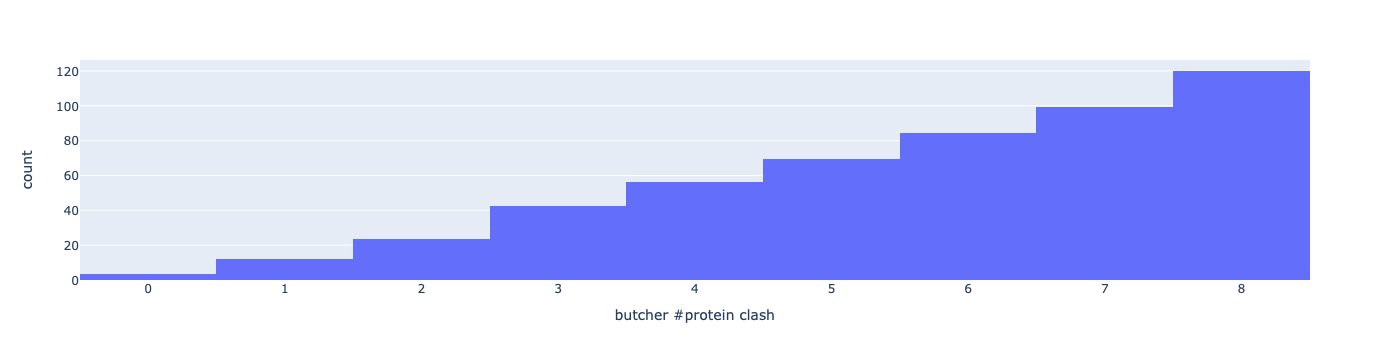

In [99]:
px.histogram(fg_top120, x='butcher #protein clash', cumulative=True)

## Export by ref_pdb

In [100]:
refs = set(fg_top120['ref_pdb'].values)
refs

{'x0310', 'x0528', 'x0875'}

In [101]:
for ref in refs:
    subset = fg_top120[fg_top120['ref_pdb'] == ref]
    PandasTools.WriteSDF(subset, f'filtered_2A_iter2_fegrow_{ref}.sdf', idName='ID', properties=fg_top120.columns)

# Fragmenstein

# to-do's

* Fragmenstein

In [102]:
# matteo SDF
mf_sdf = Path('/Users/tfb64483/Data/A71EV2A/Matteo/iteration-2/results/A71-ROCS-iter2.sdf')

In [114]:
mf = PandasTools.LoadSDF(mf_sdf)
mf = mf.iloc[1:, :]
mf = mf.drop(columns=['ref_url', 'submitter_name', 'submitter_email', 'submitter_institution', 'generation_date', 'method'])

In [115]:
mf.head()

,rationale,experiment,cluster_label,cluster_rank,N_interactions,∆∆G,comRMSD,ROCS_TanimotoCombo,ROCS_ShapeTanimoto,ROCS_ColorTanimoto,ID,ROMol,ref_pdb,ref_mols,original SMILES
1,info info set:bb_whole;hbond:S87+S105+G127; hy...,bb_whole,3,1,6,-11.29999,0.535039,0.435,0.282,0.152,EN300_26666438,<rdkit.Chem.rdchem.Mol object at 0x16f442880>,x0310_0A,"x0446_0A,x1080_0A,x0929_0A,x0812_0A,x0719_0A,x...",CC(C)(C)OC(=O)N(c1ccccc1Cl)c1nc(S)nc2ccccc12
2,info info set:3d;halogenbond:S105; hbond:S87; ...,3d,19,1,3,-0.002186,0.47978,0.31,0.21,0.1,Z45507458,<rdkit.Chem.rdchem.Mol object at 0x16f442960>,x0310_0A,"x0446_0A,x1080_0A,x0929_0A,x0812_0A,x0719_0A,x...",CN1CCN(S(=O)(=O)c2ccc(F)c(Cl)c2)CC1
3,info info set:bb_densepocket2;hbond:S105+S125;...,bb_densepocket2,4,1,5,-3.582513,0.939464,0.621,0.227,0.394,EN300_27782356,<rdkit.Chem.rdchem.Mol object at 0x16f442c70>,x0310_0A,"x0446_0A,x1080_0A,x0929_0A,x0812_0A,x0719_0A,x...",CCOC(=O)c1ccc(N)c(NC)n1
4,info info set:bb_densepocket2;hbond:S125+P107;,bb_densepocket2,11,1,2,-5.89769,0.57136,0.638,0.201,0.437,EN300_2908013,<rdkit.Chem.rdchem.Mol object at 0x16f442500>,x0310_0A,"x0446_0A,x1080_0A,x0929_0A,x0812_0A,x0719_0A,x...",CNc1nccc(C)c1N
5,info info set:3d;halogenbond:C110; hbond:S87+G...,3d,2,1,4,-2.228437,0.700812,0.338,0.223,0.115,Z1078498278,<rdkit.Chem.rdchem.Mol object at 0x16f442340>,x0310_0A,"x0446_0A,x1080_0A,x0929_0A,x0812_0A,x0719_0A,x...",Cc1ccc(F)c(C(=O)N2CCC[C@@H]2C(=O)O)c1


In [120]:
mf['cluster_rank'] = [int(s) for s in mf['cluster_rank']]

In [130]:
len(mf[mf['cluster_rank'] < 25])

249